In [1]:
import pandas as pd
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Doing below setting to ensure that we do not see truncated data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Importing Dataset

In [3]:
mobileusebasedata_df = pd.read_csv("mobileusebasedata.csv")
most_used_screens_df = pd.read_csv("most_used_screens.csv")

#Sample data
mobileusebasedata_engineered_df = pd.read_csv("mobileusebasedata_engineered.csv")

In [4]:
mobileusebasedata_df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
mobileusebasedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [6]:
mobileusebasedata_df.nunique()


user                    49874
first_open              49747
dayofweek                   7
hour                       24
age                        78
screen_list             38799
numscreens                151
minigame                    2
used_premium_feature        2
enrolled                    2
enrolled_date           31001
liked                       2
dtype: int64

From above we can conclude that there are total **49874** unique users rest are duplicates

## Removing Duplicates

In [7]:
mobileusebasedata_df[mobileusebasedata_df.duplicated(subset='user',keep=False)].sort_values(by='user')

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
20029,2477,2013-04-15 17:45:44.684,0,17:00:00,29,"Loan2,Loan",3,0,1,0,NaN,0
27838,2477,2013-04-15 17:45:44.684,0,17:00:00,27,"Loan2,Loan",3,0,1,0,NaN,0
31420,3793,2013-01-27 15:48:16.437,6,15:00:00,36,"idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyMobile,VerifySSN,location,VerifyDateOfBirth,Credit1,Credit3Dashboard,Credit2,Institutions,Loan2,CommunityAndInvites,Home,SelectInstitution,BankVerification,MLWebView,product_review",47,0,0,1,2013-01-27 15:50:22.950,0
28760,3793,2013-01-27 15:48:16.437,6,15:00:00,36,"idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyMobile,VerifySSN,location,VerifyDateOfBirth,Credit1,Credit3Dashboard,Credit2,Institutions,Loan2,CommunityAndInvites,Home,SelectInstitution,BankVerification,MLWebView,product_review",47,0,0,1,2013-01-27 15:50:22.950,0
49397,5867,2013-02-11 08:46:43.530,0,08:00:00,26,"Cycle,Home,Institutions,SelectInstitution,BankVerification,GroupedInstitutions,Loan2",18,0,0,0,NaN,1
49052,5867,2013-02-11 08:46:43.530,0,08:00:00,27,"Cycle,Home,Institutions,SelectInstitution,BankVerification,GroupedInstitutions,Loan2",18,0,0,0,NaN,1
43600,8767,2013-05-14 23:24:19.949,1,23:00:00,34,"Splash,idscreen,Cycle,product_review,product_review,product_review,product_review3,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Credit2",22,0,0,1,2013-05-14 23:25:45.033,0
49509,8767,2013-05-14 23:24:19.949,1,23:00:00,36,"Splash,idscreen,Cycle,product_review,product_review,product_review,product_review3,Home,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Credit2",22,0,0,1,2013-05-14 23:25:45.033,0
29136,9472,2013-03-19 02:00:03.641,1,02:00:00,47,"joinscreen,Cycle,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN",13,0,0,1,2013-03-19 02:01:59.045,0
12650,9472,2013-03-19 02:00:03.641,1,02:00:00,41,"joinscreen,Cycle,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,VerifySSN",13,0,0,1,2013-03-19 02:01:59.045,0


From above we can observe that reason for duplication is different value for age column , hence we can conclude that presence of duplicate entry is not providing us any information and must have happened becaue of issue during data collection

In [8]:

print("original shape of mobileusebasedata -> ",mobileusebasedata_df.shape)
print("duplicates in mobileusebasedata -> ",mobileusebasedata_df[mobileusebasedata_df.duplicated(subset='user')].shape)

##126 rows have duplicate users so dropping them -> nearly 0.002% data [126 out of 50000 records]

#Dropping duplicates:
mobileusebasedata_df = mobileusebasedata_df.drop_duplicates(subset=['user'])
print("unique rows in mobileusebasedata -> ",mobileusebasedata_df.shape)

original shape of mobileusebasedata ->  (50000, 12)
duplicates in mobileusebasedata ->  (126, 12)
unique rows in mobileusebasedata ->  (49874, 12)


In [9]:
mobileusebasedata_df.info()
#enrolled has null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49874 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  49874 non-null  int64 
 1   first_open            49874 non-null  object
 2   dayofweek             49874 non-null  int64 
 3   hour                  49874 non-null  object
 4   age                   49874 non-null  int64 
 5   screen_list           49874 non-null  object
 6   numscreens            49874 non-null  int64 
 7   minigame              49874 non-null  int64 
 8   used_premium_feature  49874 non-null  int64 
 9   enrolled              49874 non-null  int64 
 10  enrolled_date         31004 non-null  object
 11  liked                 49874 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.9+ MB


In [10]:
most_used_screens_df.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [11]:
most_used_screens_df.nunique()
#58 -> top screens are available

Unnamed: 0     58
top_screens    58
dtype: int64

In [12]:
mobileusebasedata_df.describe()
# age, numscreens has  outliers

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000
mean,186896.726812,3.029334,31.713157,21.098849,0.107752,0.171853,0.621647,0.165076
std,107769.419474,2.032075,10.803037,15.726940,0.310069,0.377256,0.484981,0.371253
min,13.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93510.250000,1.000000,24.000000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.000000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279982.500000,5.000000,37.000000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.000000,325.000000,1.000000,1.000000,1.000000,1.000000


From large difference between the Median and max value for Age and numscreens we can conclude that our dataset could have outlier for Age and numscreens column.

                                              -x-

## Data Understanding

### Set 1 Data

In [13]:
mobileusebasedata = mobileusebasedata_df.copy()

#### Changing datatype

In [14]:
#Converting hour to int to create it as feature
mobileusebasedata['hour'] = pd.to_datetime(mobileusebasedata['hour'].str.strip(), format='%H:%M:%S')
mobileusebasedata["hour"] = mobileusebasedata["hour"].dt.hour.astype(int)

#### Null values check

In [15]:
null_counts = mobileusebasedata.isnull().mean()*100
sorted_null_counts = null_counts.sort_values(ascending=False)
sorted_null_counts

enrolled_date           37.835345
user                     0.000000
first_open               0.000000
dayofweek                0.000000
hour                     0.000000
age                      0.000000
screen_list              0.000000
numscreens               0.000000
minigame                 0.000000
used_premium_feature     0.000000
enrolled                 0.000000
liked                    0.000000
dtype: float64

Enrolled date seems to be mostly nulls so removing it from further analysis (**~38% null values**)

In [16]:

mobileusebasedata.drop(columns='enrolled_date', inplace = True)

#### Date Check - col first_open

In [17]:
mobileusebasedata.nunique()

user                    49874
first_open              49747
dayofweek                   7
hour                       24
age                        78
screen_list             38799
numscreens                151
minigame                    2
used_premium_feature        2
enrolled                    2
liked                       2
dtype: int64

In [18]:
mobileusebasedata['first_open'].nunique()

49747

In [19]:
mobileusebasedata['first_open'].min(), mobileusebasedata['first_open'].max()


('2012-11-23 00:10:19.912', '2013-07-09 15:52:39.983')

We do not have complete years data

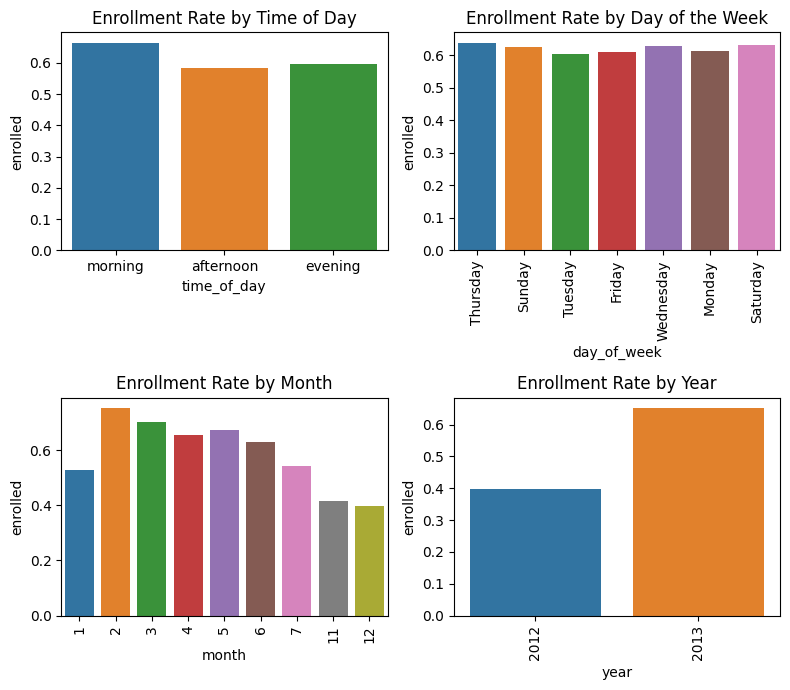

In [20]:
mobileusebasedata['first_open'] = pd.to_datetime(mobileusebasedata['first_open'])

mobileusebasedata['day_of_week'] = mobileusebasedata['first_open'].dt.day_name()
mobileusebasedata['month'] = mobileusebasedata['first_open'].dt.month
mobileusebasedata['year'] = mobileusebasedata['first_open'].dt.year

bins = [0, 12, 17, 24]
labels = ['morning', 'afternoon', 'evening']
mobileusebasedata['time_of_day'] = pd.cut(mobileusebasedata['hour'], bins=bins, labels=labels, include_lowest=True)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7))

# time of day
sns.barplot(x='time_of_day', y='enrolled', data=mobileusebasedata, ci=None, ax=axes[0, 0])
axes[0, 0].set_title('Enrollment Rate by Time of Day')

# day of the week
sns.barplot(x='day_of_week', y='enrolled', data=mobileusebasedata, ci=None, ax=axes[0, 1])
axes[0, 1].set_title('Enrollment Rate by Day of the Week')
axes[0, 1].tick_params(axis='x', rotation=90)

# month
sns.barplot(x='month', y='enrolled', data=mobileusebasedata, ci=None, ax=axes[1, 0])
axes[1, 0].set_title('Enrollment Rate by Month')
axes[1, 0].tick_params(axis='x', rotation=90)

# year
sns.barplot(x='year', y='enrolled', data=mobileusebasedata, ci=None, ax=axes[1, 1])
axes[1, 1].set_title('Enrollment Rate by Year')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


#### each col distribution understanding





1.   Since the unique users is 49874 and unique first_open is 49747 , utilizing this column directly as a feature might not be particularly informative.
2.  Even after attempting to bin the values to discern patterns, no distinct relationships with the target variable "enrolled" were observed.

Hence dropping the first_open and featured derived using this columns



In [21]:

mobileusebasedata.drop(columns=['first_open', 'month', 'year', 'day_of_week', 'time_of_day'], inplace = True)

In [22]:
mobileusebasedata["enrolled"].value_counts(normalize=True)

1    0.621647
0    0.378353
Name: enrolled, dtype: float64

We have an imbalanced dataset

#### Distribution of data using Histogram

In [23]:
mobileusebasedata.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')

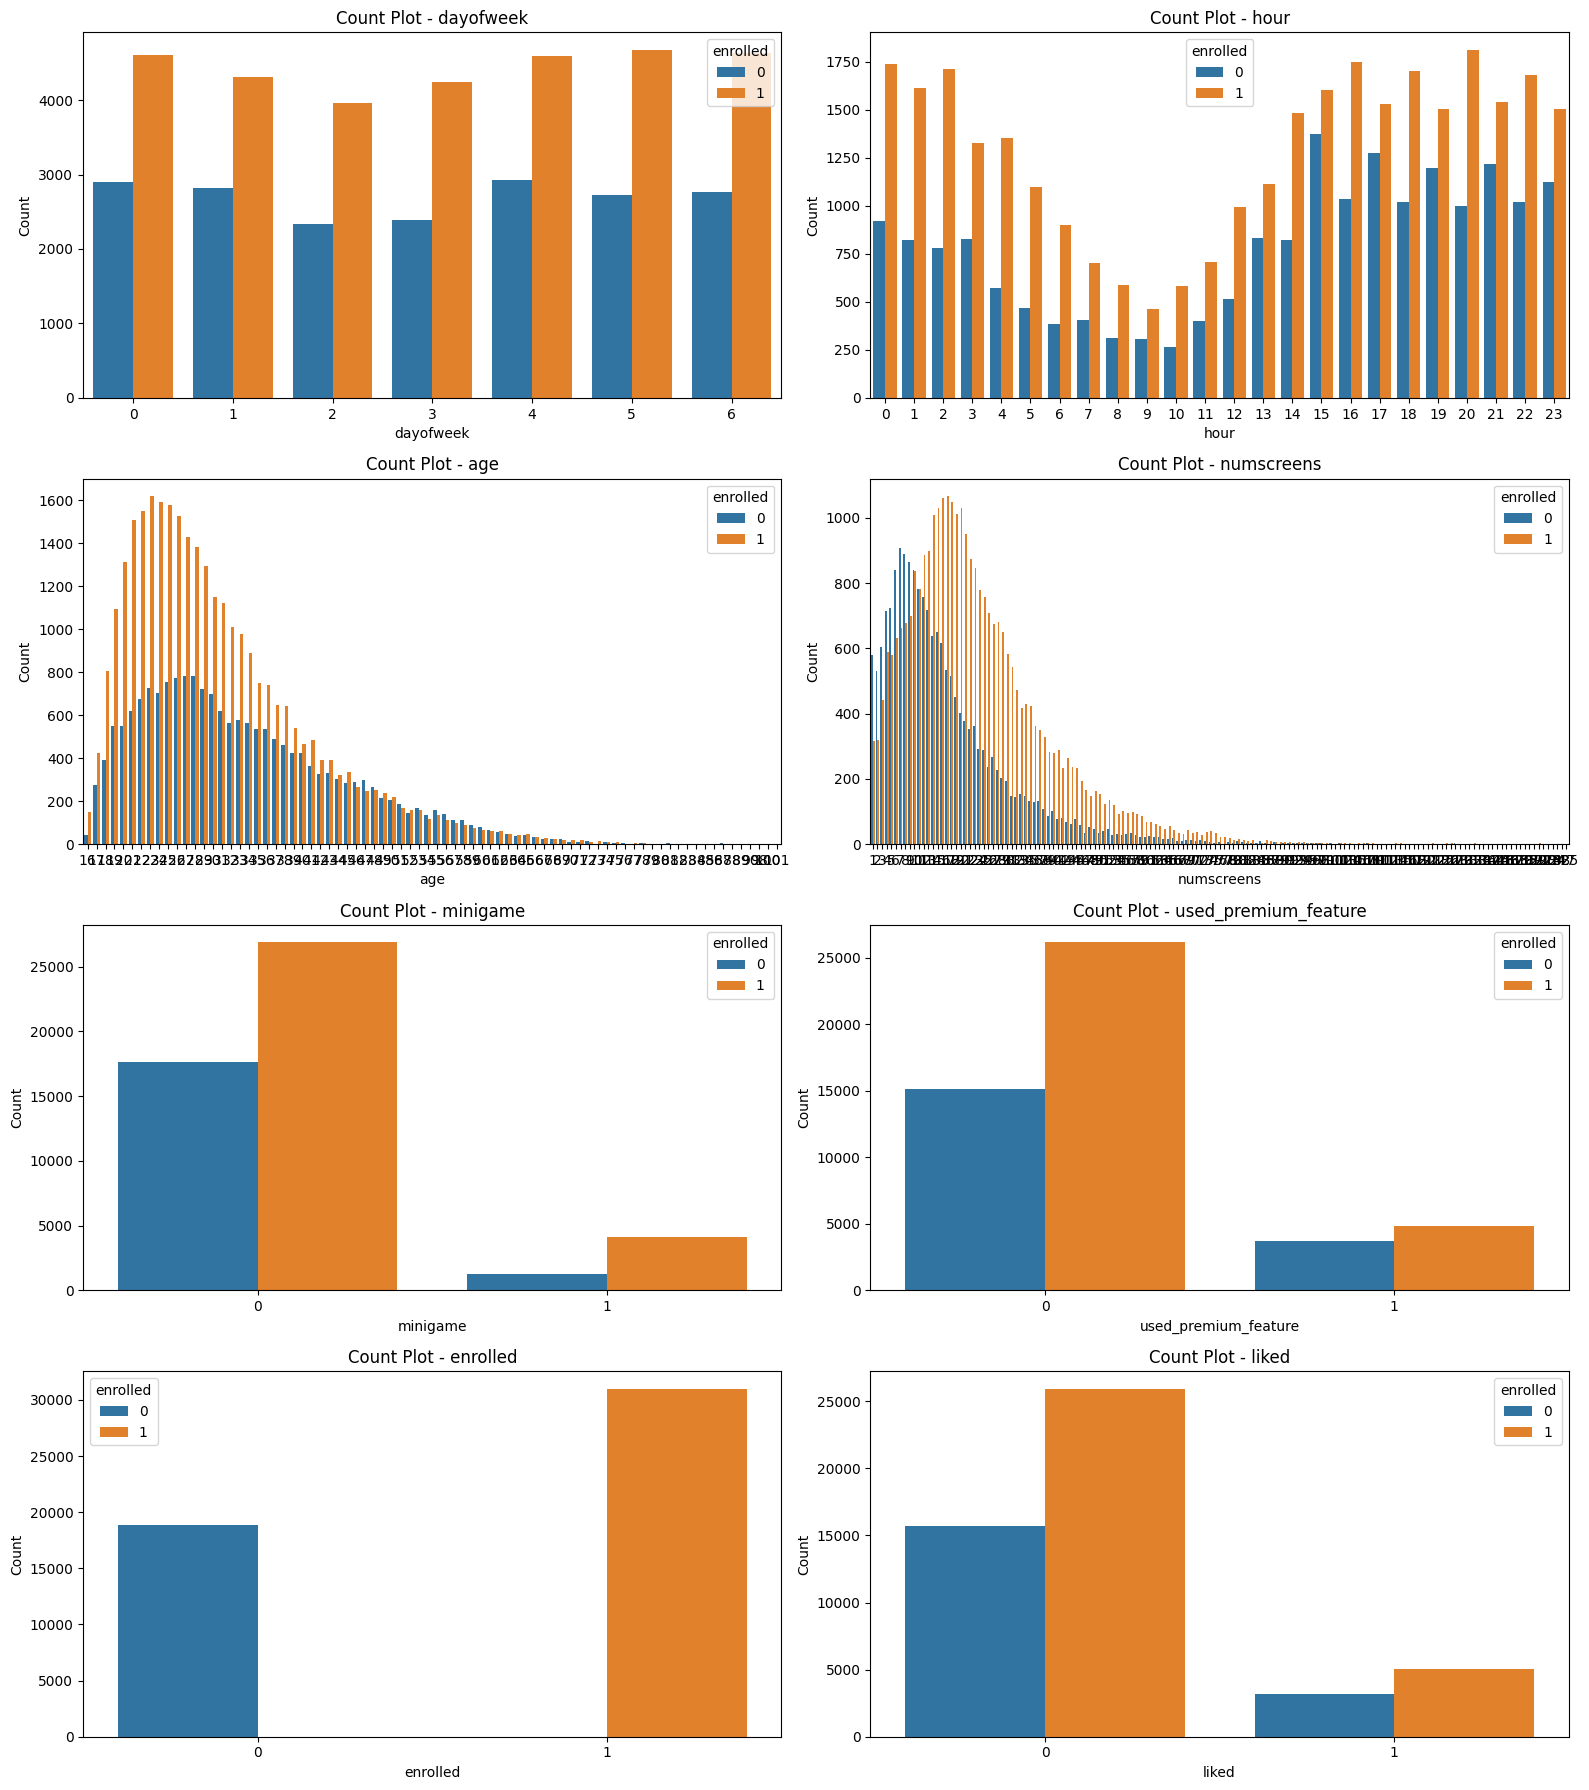

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
axes = axes.flatten()
columns_to_plot = ['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
                   'used_premium_feature', 'enrolled', 'liked']

for i, column in enumerate(columns_to_plot):
    sns.countplot(data=mobileusebasedata, x=column, ax=axes[i], hue='enrolled')
    axes[i].set_title(f'Count Plot - {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


Inference: age,numscreen -> right skewed
    
Day of Week Distribution:
The distribution of user activity across days of the week varies,
with a peak on day 4 (possibly Thursday) and relatively lower activity on days 2 and 3 (Tuesday and Wednesday).

Hourly Distribution:
User activity is highest during the 15th to 20th hours of the day,
suggesting peak usage during late afternoon and early evening.

Activity decreases during the early morning hours (0-9) and gradually increases from morning to late afternoon.

Age Distribution:
The age distribution is right-skewed, with the majority of users in their early to mid-20s.

Numscreens Distribution:
The distribution of the number of screens viewed by users is right-skewed, with a few users having a
significantly higher number of screens.

Minigame and Used Premium Feature Distribution:
The majority of users did not play the minigame (0), while a smaller percentage engaged in the minigame (1).
A larger proportion of users did not use the premium feature (0), while a smaller percentage used the premium
feature (1).

Liked Distribution:
The distribution of the 'liked' feature suggests that a significant number of users did not indicate liking (0),
while a smaller percentage did indicate liking (1).

#### Above columns correlation with target variable : Since features with high correlation might have more predictive power.

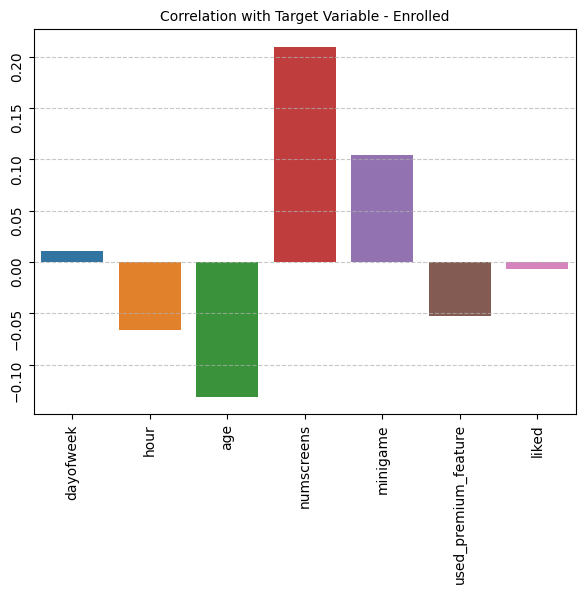

In [25]:
# Above columns correlation with target variable
columns_to_plot = ['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
                   'used_premium_feature', 'liked']
plt.figure(figsize=(7, 5))
plt.title('Correlation with Target Variable - Enrolled', fontsize=10)
correlation_data = mobileusebasedata[columns_to_plot]
correlation_values = correlation_data.corrwith(mobileusebasedata['enrolled'])

ax = sns.barplot(x=correlation_values.index, y=correlation_values)
ax.tick_params(labelsize=10, labelrotation=90, color='k')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

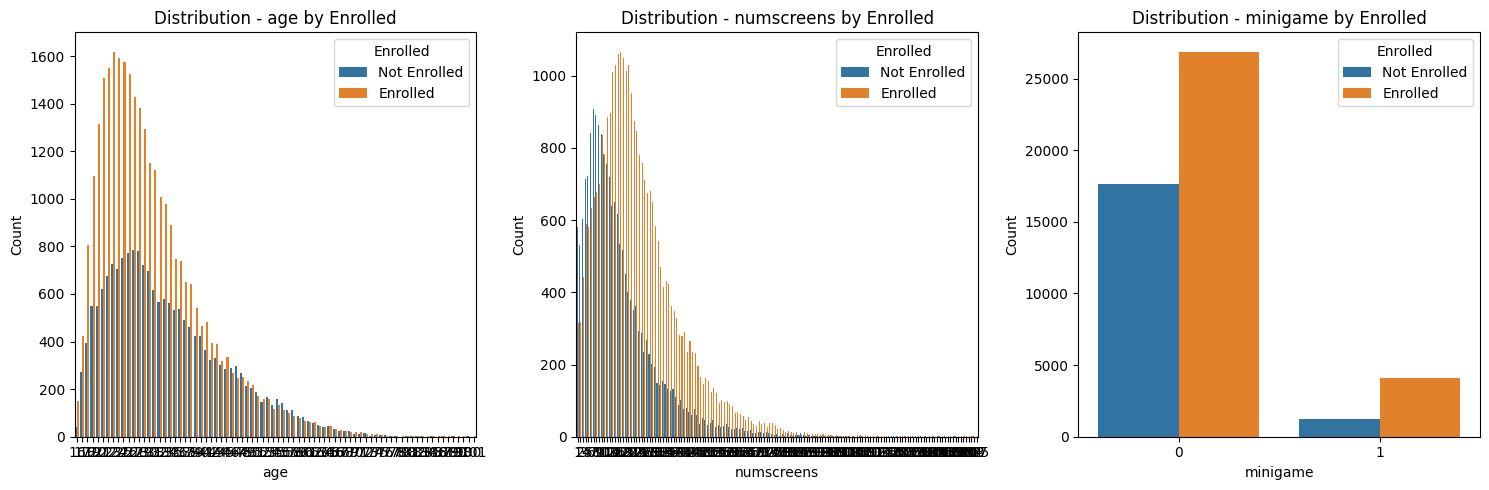

In [26]:
# Seeing distribution of columns that are highly correlated with target variable
cols =['enrolled', 'age', 'numscreens', 'minigame']
plt.figure(figsize=(15, 5))

for i, column in enumerate(cols[1:]):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=column, hue='enrolled', data=mobileusebasedata)
    plt.title(f'Distribution - {column} by Enrolled')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Enrolled', labels=['Not Enrolled', 'Enrolled'])

plt.tight_layout()
plt.show()

#

Minigame does not seem to have any distinctive trait

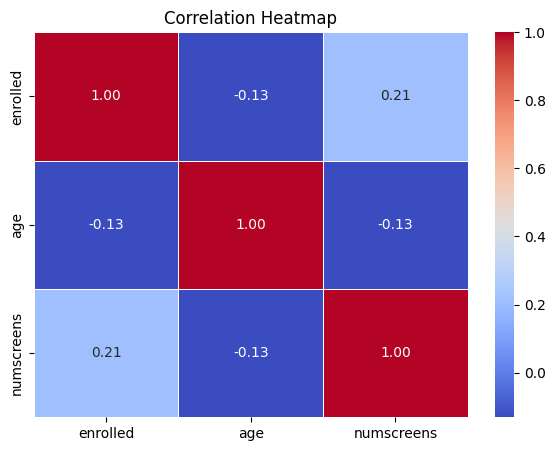

In [27]:
# Checking the correlation between age and numscreens:
cols =['enrolled', 'age', 'numscreens']
correlation_matrix = mobileusebasedata[cols].corr()
# print(correlation_matrix)

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


Normalizing Age And Numscreens column

In [28]:

mobileusebasedata['age_log'] = mobileusebasedata['age'].apply(np.log)


In [29]:

mobileusebasedata['numscreens_log'] = mobileusebasedata['numscreens'].apply(np.log)


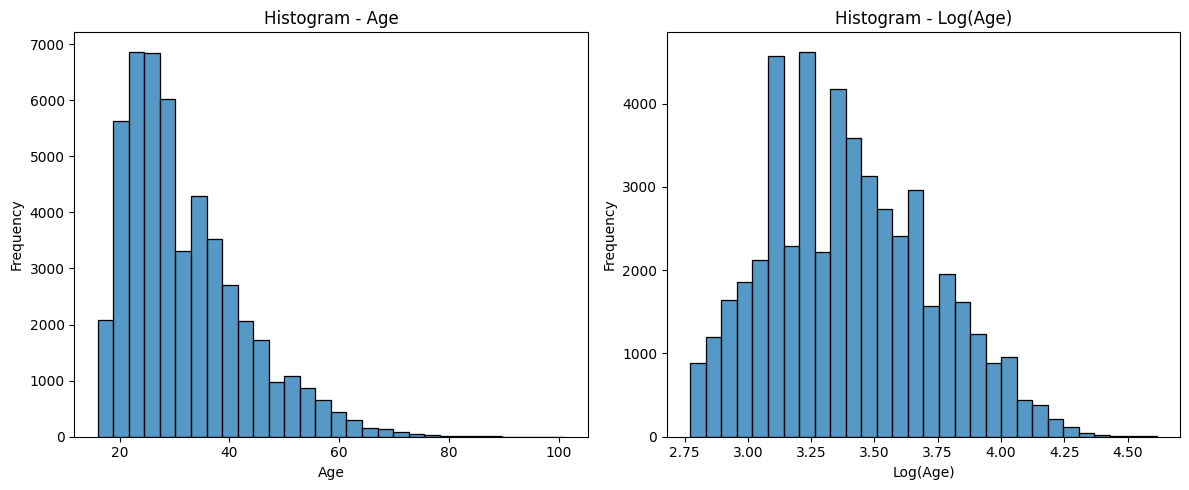

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for 'age'
sns.histplot(x='age', data=mobileusebasedata, bins=30, kde=False, ax=axes[0])
axes[0].set_title('Histogram - Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'age_log'
sns.histplot(x='age_log', data=mobileusebasedata, bins=30, kde=False, ax=axes[1])
axes[1].set_title('Histogram - Log(Age)')
axes[1].set_xlabel('Log(Age)')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


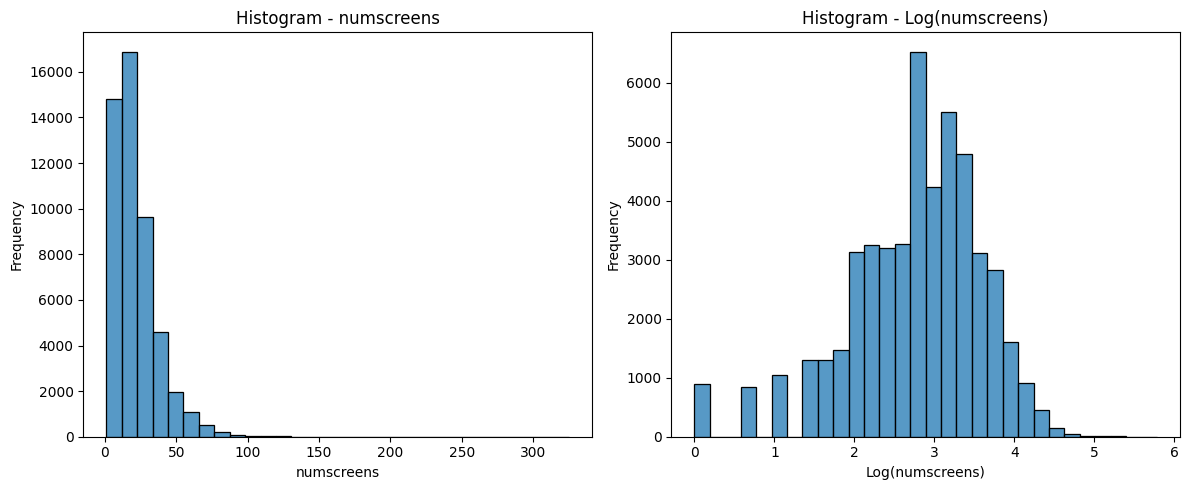

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for 'numscreen'
sns.histplot(x='numscreens', data=mobileusebasedata, bins=30, kde=False, ax=axes[0])
axes[0].set_title('Histogram - numscreens')
axes[0].set_xlabel('numscreens')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'numscreens_log'
sns.histplot(x='numscreens_log', data=mobileusebasedata, bins=30, kde=False, ax=axes[1])
axes[1].set_title('Histogram - Log(numscreens)')
axes[1].set_xlabel('Log(numscreens)')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [32]:
# Keeping columns that have clear distinct feature between those who enrolled (1) and those who did not (0)

In [33]:
all_cols_set1 = ['user','enrolled', 'age_log', 'numscreens_log', 'screen_list']

In [34]:
mobileusebasedata_2 = mobileusebasedata[all_cols_set1]
mobileusebasedata_2.head(1)

,user,enrolled,age_log,numscreens_log,screen_list
0,235136,0,3.135494,2.70805,"idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login"


                                    -x-

### Set 2 data

In [35]:
mobileusebasedata_3 = mobileusebasedata_2.copy(deep=True)

Creating function to remove case sentivity and digits mentioned along with screen names

In [36]:
import re
def process_column_value(value):

    return re.sub(r'\d+', '', value.lower())

mobileusebasedata_3['screen_list']=mobileusebasedata_3['screen_list'].apply(process_column_value)

In [37]:
# mobileusebasedata_3['screen_list'][15]

In [38]:
def explode_columns_screen_list(df):
    df['screen_list_cleaned'] = df['screen_list'].str.lower().str.split(',')
    df = df.explode('screen_list_cleaned', ignore_index=True)
    df['count'] = 1
    pivot_df = pd.pivot_table(df, index='user', columns=['screen_list_cleaned'], values='count', aggfunc='sum', fill_value=0)
    pivot_df = pivot_df.reset_index().fillna('')
    print(pivot_df.shape)
    return pivot_df


mobileusebasedata_3 = explode_columns_screen_list(mobileusebasedata_3)

(49874, 119)


In [39]:
merged_df = mobileusebasedata_2.merge(mobileusebasedata_3,on='user',how='inner')


Dropping below columns from the merged dataframe :


1.   user : Because this column is not useful for our analysis as user_id does not determine whether a person will enroll or not
2.   screen_list : Because we have seperated the information present in this column into multiple columns


In [40]:
merged_df.drop(columns=['user','screen_list'],axis=1,inplace=True)

In [41]:
len(merged_df.columns)

121

In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49874 entries, 0 to 49873
Columns: 121 entries, enrolled to yournetwork
dtypes: float64(2), int64(119)
memory usage: 46.4 MB


In [43]:
merged_df.dtypes

enrolled                       int64
age_log                      float64
numscreens_log               float64
about                          int64
accountview                    int64
addproperty                    int64
addvehicle                     int64
adverseactions                 int64
alerts                         int64
bankverification               int64
boostfriendslist               int64
bvplaidlinkcontainer           int64
bvstats                        int64
camerascreen                   int64
cc                             int64
cccategory                     int64
communityandinvites            int64
contactinfoconfirm             int64
credit                         int64
creditalerts                   int64
creditcontainer                int64
creditcta                      int64
creditdashboard                int64
credits                        int64
cycle                          int64
editprofile                    int64
employmentinfo                 int64
e

In [44]:
merged_df.describe()

,enrolled,age_log,numscreens_log,about,accountview,addproperty,addvehicle,adverseactions,alerts,bankverification,boostfriendslist,bvplaidlinkcontainer,bvstats,camerascreen,cc,cccategory,communityandinvites,contactinfoconfirm,credit,creditalerts,creditcontainer,creditcta,creditdashboard,credits,cycle,editprofile,employmentinfo,employmentsummary,finances,findfriendscycle,forgotpassword,groupedinstitutions,history,home,idandselfiecamerascreen,identityverification,idscreen,instantloanssn,instantoffercreateaccount,institutions,joinscreen,landingscreen,leaderboard,listpicker,llloanamount,loan,loanappagreement,loanappbankinfo,loanappconfirmwithdrawal,loanappdenied,loanappesign,loanapploan,loanapppaymentschedule,loanapppromocode,loanappreasons,loanapprequestamount,loanappschedulecall,loanappsuccess,loanappverifybankinfo,loanappwithdrawn,location,login,loginform,managefinances,mlwebview,networkfailure,networkuser,newcontactlistinvite,payoff,product_review,profileannualincome,profilechildren,profilecompanyname,profileeducation,profileeducationmajor,profileemploymentlength,profilejobtitle,profilemaritalstatus,profilepage,profileproduct_review,profileverifyincometype,profileverifyssn,providerlist,referralcontainer,referrals,referralscreen,resendtoken,reviewcreditcard,rewarddetail,rewardjoinscreen,rewards,rewardscontainer,saving,savingamount,savinggoaledit,savinggoalincomesalary,savinggoalother,savinggoalpreview,scanpreview,securitymodal,selectinstitution,settings,signup,signupemail,signupname,splash,transactionlist,verifyannualincome,verifybankinfo,verifycountry,verifydateofbirth,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
count,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.00000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000,49874.000000
mean,0.621647,3.404343,2.755848,0.011068,0.026226,0.000080,0.000321,0.000261,0.069134,0.318021,0.001143,0.009203,0.000481,0.002065,0.116895,0.059931,0.080623,0.001383,0.400890,0.007940,0.329992,0.000020,0.190681,0.000822,0.355456,0.048963,0.000160,0.000481,0.076352,0.015339,0.003609,0.036271,0.032281,0.762020,0.000020,0.000040,0.340679,0.000040,0.001223,0.293219,0.266572,0.005574,0.051570,0.007599,0.005173,0.768637,0.000581,0.000842,0.000241,0.002967,0.003509,0.000020,0.006958,0.001243,0.001564,0.001905,0.002707,0.002927,0.000100,0.000120,0.517925,0.017905,0.025083,0.007820,0.076493,0.008201,0.000040,0.012772,0.002065,2.644925,0.005273,0.046116,0.021334,0.042788,0.041023,0.021

As for most of the numberical columns max value is less than 100 we can reduse the merged_df size by changing its datatype

In [45]:
int8_col=[]
int16_col=[]
int32_col=[]
int64_col=[]

for col in merged_df.columns:

  if merged_df[col].dtype not in ('datetime64[ns]','object') :

    if merged_df[col].between(-128, 127).all():
      int8_col.append(col)

    elif merged_df[col].between(-32768, 32767).all():
      int16_col.append(col)

    elif merged_df[col].between(-2147483648, 2147483647).all():
      int32_col.append(col)

    else:
      int64_col.append(col)



for col in int8_col:
  merged_df[col]=merged_df[col].astype(np.int8)

for col in int16_col:
  merged_df[col]=merged_df[col].astype(np.int16)

for col in int32_col:
  merged_df[col]=merged_df[col].astype(np.int32)


In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49874 entries, 0 to 49873
Columns: 121 entries, enrolled to yournetwork
dtypes: int8(121)
memory usage: 6.1 MB




We have reduced the dataframe size from 46.4 MB to 6.1 MB **~ 87 % **reduction in size

In [47]:
merged_df.head(2)

,enrolled,age_log,numscreens_log,about,accountview,addproperty,addvehicle,adverseactions,alerts,bankverification,boostfriendslist,bvplaidlinkcontainer,bvstats,camerascreen,cc,cccategory,communityandinvites,contactinfoconfirm,credit,creditalerts,creditcontainer,creditcta,creditdashboard,credits,cycle,editprofile,employmentinfo,employmentsummary,finances,findfriendscycle,forgotpassword,groupedinstitutions,history,home,idandselfiecamerascreen,identityverification,idscreen,instantloanssn,instantoffercreateaccount,institutions,joinscreen,landingscreen,leaderboard,listpicker,llloanamount,loan,loanappagreement,loanappbankinfo,loanappconfirmwithdrawal,loanappdenied,loanappesign,loanapploan,loanapppaymentschedule,loanapppromocode,loanappreasons,loanapprequestamount,loanappschedulecall,loanappsuccess,loanappverifybankinfo,loanappwithdrawn,location,login,loginform,managefinances,mlwebview,networkfailure,networkuser,newcontactlistinvite,payoff,product_review,profileannualincome,profilechildren,profilecompanyname,profileeducation,profileeducationmajor,profileemploymentlength,profilejobtitle,profilemaritalstatus,profilepage,profileproduct_review,profileverifyincometype,profileverifyssn,providerlist,referralcontainer,referrals,referralscreen,resendtoken,reviewcreditcard,rewarddetail,rewardjoinscreen,rewards,rewardscontainer,saving,savingamount,savinggoaledit,savinggoalincomesalary,savinggoalother,savinggoalpreview,scanpreview,securitymodal,selectinstitution,settings,signup,signupemail,signupname,splash,transactionlist,verifyannualincome,verifybankinfo,verifycountry,verifydateofbirth,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0


## Feature Engineering

In [48]:
engineered_df=merged_df.copy(deep=True)

In [49]:
import plotly.express as px

corr = engineered_df.corr()

corr_enrolled = corr.loc[['enrolled']]

fig = px.imshow(corr_enrolled,
                color_continuous_scale='blues',
                labels=dict(color='Correlation'),
                x=corr_enrolled.columns,
                y=['enrolled'],
                title='Correlation Heatmap with Enrolled')

fig.update_layout(coloraxis_colorbar=dict(title='Correlation'),
                  xaxis=dict(title='Features'))

fig.update_layout(width=1200, height=500)

fig.show()


In [50]:
corr_enrolled

,enrolled,age_log,numscreens_log,about,accountview,addproperty,addvehicle,adverseactions,alerts,bankverification,boostfriendslist,bvplaidlinkcontainer,bvstats,camerascreen,cc,cccategory,communityandinvites,contactinfoconfirm,credit,creditalerts,creditcontainer,creditcta,creditdashboard,credits,cycle,editprofile,employmentinfo,employmentsummary,finances,findfriendscycle,forgotpassword,groupedinstitutions,history,home,idandselfiecamerascreen,identityverification,idscreen,instantloanssn,instantoffercreateaccount,institutions,joinscreen,landingscreen,leaderboard,listpicker,llloanamount,loan,loanappagreement,loanappbankinfo,loanappconfirmwithdrawal,loanappdenied,loanappesign,loanapploan,loanapppaymentschedule,loanapppromocode,loanappreasons,loanapprequestamount,loanappschedulecall,loanappsuccess,loanappverifybankinfo,loanappwithdrawn,location,login,loginform,managefinances,mlwebview,networkfailure,networkuser,newcontactlistinvite,payoff,product_review,profileannualincome,profilechildren,profilecompanyname,profileeducation,profileeducationmajor,profileemploymentlength,profilejobtitle,profilemaritalstatus,profilepage,profileproduct_review,profileverifyincometype,profileverifyssn,providerlist,referralcontainer,referrals,referralscreen,resendtoken,reviewcreditcard,rewarddetail,rewardjoinscreen,rewards,rewardscontainer,saving,savingamount,savinggoaledit,savinggoalincomesalary,savinggoalother,savinggoalpreview,scanpreview,securitymodal,selectinstitution,settings,signup,signupemail,signupname,splash,transactionlist,verifyannualincome,verifybankinfo,verifycountry,verifydateofbirth,verifyhousing,verifyhousingamount,verifyincometype,verifymobile,verifyphone,verifyssn,verifytoken,webview,welcomebankverification,yournetwork
enrolled,1.0,-0.065127,0.23661,-0.009148,-0.072726,0.006987,-0.002185,-0.015575,-0.138924,0.209781,-0.01032,0.030162,-0.013044,-0.008223,0.015605,0.018794,-0.02895,0.004567,0.233223,-0.088587,0.083172,-0.00574,0.077894,-0.007916,0.109994,0.003629,-0.006442,0.007692,0.009928,0.025042,0.013171,-0.028207,-0.150371,0.003429,0.003493,-0.001588,0.187867,-0.008117,-0.004637,0.026068,0.164489,-0.008784,-0.013623,-0.026948,-0.045751,-0.163144,-0.012053,-0.028661,-0.014554,-0.050168,-0.048095,-0.00574,-0.020747,0.006404,0.003674,0.000895,-0.042112,-0.045732,-0.008706,-0.01029,0.237732,-0.024671,-0.039308,-0.003493,-0.055778,0.008135,-0.008117,0.018045,-0.031901,0.235347,-0.018548,0.02074,0.030778,0.02807,0.027954,0.023704,0.026441,0.018014,-0.028748,-0.01259,-0.021203,-0.097313,-0.01471,0.047643,0.005741,0.012313,-0.011316,-0.004305,0.016974,0.002771,0.01308,0.017115,0.045283,-0.031202,0.000248,-0.012372,0.009101,0.004552,0.374285,0.031171,0.249096,-0.051479,0.009013,0.002359,0.011838,-0.052009,-0.04592,0.043308,-0.012791,0.224732,0.262674,0.047602,0.04551,0.041401,0.142444,0.38506,0.679326,0.265257,-0.065214,-0.101697,-0.020606


In [51]:
high_corr_columns = corr_enrolled.columns[abs(corr_enrolled.iloc[0]) > 0.08]
high_corr_columns

Index(['enrolled', 'numscreens_log', 'alerts', 'bankverification', 'credit',
       'creditalerts', 'creditcontainer', 'cycle', 'history', 'idscreen',
       'joinscreen', 'loan', 'location', 'product_review', 'profileverifyssn',
       'scanpreview', 'selectinstitution', 'verifycountry',
       'verifydateofbirth', 'verifymobile', 'verifyphone', 'verifyssn',
       'verifytoken', 'welcomebankverification'],
      dtype='object')

In [52]:
imp_features_check = ['numscreens_log', 'age_log', 'alerts', 'bankverification', 'credit',
       'creditalerts', 'creditcontainer', 'cycle', 'history', 'idscreen',
       'joinscreen', 'loan', 'location', 'product_review', 'profileverifyssn',
       'scanpreview', 'selectinstitution', 'verifycountry',
       'verifydateofbirth', 'verifymobile', 'verifyphone', 'verifyssn',
       'verifytoken', 'welcomebankverification']
len(imp_features_check)


24

In [53]:
imp_features=['age_log','numscreens_log','alerts','bankverification','credit','creditalerts','creditcontainer','creditdashboard','cycle','history','idscreen','joinscreen','loan','location','product_review',
              'profileverifyssn','scanpreview','selectinstitution','verifycountry','verifydateofbirth','verifymobile','verifyphone','verifyssn','verifytoken'
              ]
len(imp_features)

24

In [54]:
feature_engineered_df = pd.DataFrame()
feature_engineered_df = engineered_df[['enrolled']+imp_features]
len(feature_engineered_df.columns)

25

In [55]:
feature_engineered_df.corr()

,enrolled,age_log,numscreens_log,alerts,bankverification,credit,creditalerts,creditcontainer,creditdashboard,cycle,history,idscreen,joinscreen,loan,location,product_review,profileverifyssn,scanpreview,selectinstitution,verifycountry,verifydateofbirth,verifymobile,verifyphone,verifyssn,verifytoken
enrolled,1.000000,-0.065127,0.236610,-0.138924,0.209781,0.233223,-0.088587,0.083172,0.077894,0.109994,-0.150371,0.187867,0.164489,-0.163144,0.237732,0.235347,-0.097313,0.374285,0.249096,0.224732,0.262674,0.142444,0.385060,0.679326,0.265257
age_log,-0.065127,1.000000,-0.064892,0.045898,-0.010543,-0.012918,0.011668,-0.042152,0.030243,-0.101857,0.043500,-0.098344,-0.031919,0.006972,-0.088161,-0.051816,0.009157,-0.093426,-0.015970,-0.058265,-0.093879,-0.019674,-0.071693,-0.080793,-0.066370
numscreens_log,0.236610,-0.064892,1.000000,0.163284,0.329052,0.304703,0.057925,0.309969,0.227702,0.142802,0.055761,0.164100,0.068372,0.339915,0.414630,0.388839,0.095838,0.277397,0.379676,0.384093,0.361887,0.139442,0.453810,0.408424,0.392572
alerts,-0.138924,0.045898,0.163284,1.000000,-0.045745,0.012552,0.125231,0.156188,0.134507,-0.030980,0.164874,-0.081160,-0.092618,0.191375,-0.086492,-0.093681,-0.011010,-0.165799,-0.051534,-0.095080,-0.108342,0.017209,-0.122198,-0.115375,-0.105986
bankverification,0.209781,-0.010543,0.329052,-0.045745,1.000000,0.040322,-0.021799,0.010530,0.030097,0.081504,-0.095248,0.078352,0.098919,-0.018328,0.175617,0.312199,0.125193,0.168582,0.784034,0.340971,0.139955,0.029774,0.292663,0.307136,0.317210
credit,0.233223,-0.012918,0.304703,0.012552,0.040322,1.000000,0.052470,0.153555,0.468192,0.053691,-0.024197,0.147141,-0.073605,0.088824,0.188576,0.034482,-0.087936,0.157723,0.072099,-0.079324,0.198555,0.188914,0.243308,0.404882,-0.070857
creditalerts,-0.088587,0.011668,0.057925,0.125231,-0.021799,0.052470,1.000000,0.086638,0.146354,0.000113,0.087194,-0.033324,-0.051891,0.098028,-0.057012,-0.044298,-0.017139,-0.092875,-0.034336,-0.046459,-0.068592,-0.020352,-0.067355,-0.073339,-0.052474
creditcontainer,0.083172,-0.042152,0.309969,0.156188,0.010530,0.153555,0.086638,1.000000,0.471508,0.068856,0.086543,-0.051634,0.152638,0.235271,0.041900,-0.183250,0.008841,0.105281,0.012402,-0.110799,0.014543,0.309123,-0.012197,0.124205,-0.085721
creditdashboard,0.077894,0.030243,0.227702,0.134507,0.030097,0.468192,0.146354,0.471508,1.000000,0.075775,0.094142,-0.015277,0.001028,0.145723,0.053272,-0.142008,-0.071927,0.059372,0.028330,-0.130688,0.030850,0.256646,0.067417,0.235578,-0.119060
cycle,0.109994,-0.101857,0.142802,-0.030980,0.081504,0.053691,0.000113,0.068856,0.075775,1.000000,0.002066,0.341830,0.025600,0.036181,0.034474,0.053810,-0.012438,0.113016,0.066267,0.037024,0.027824,0.014012,0.080819,0.108931,0.046969


                                     -x-

## Splitting Data

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score,confusion_matrix, roc_curve, auc,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler


In [57]:
df = feature_engineered_df.copy(deep=True)

In [58]:
target_variable = 'enrolled'
X = df.drop(target_variable, axis=1)  # Features
y = df[target_variable]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # To care of class imbalance
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)



Checking class balance in training dataset

In [59]:
from collections import Counter

counter = Counter(y_train)
print(counter)

Counter({1: 24812, 0: 15087})


Our training dataset is quite balanced hence no need to use any re-sampling techniques

Handling class imbalance using SMOTE based techniques


A) SMOTE Technique

In [60]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({1: 24812, 0: 15087})
After Counter({1: 24812, 0: 24812})


B) ADASYN Technique

In [61]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({1: 24812, 0: 15087})
After Counter({1: 24812, 0: 22774})


C) Hybrid Techniques

C.1) SMOTE + Tomek Links


In [62]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({1: 24812, 0: 15087})
After Counter({1: 24639, 0: 24639})


C.2) SMOTE + ENN

In [63]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({1: 24812, 0: 15087})
After Counter({1: 17417, 0: 14406})


Model Building - Imbalanced data


In [64]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [65]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))

    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

In [66]:
log_model=LogisticRegression()

In [67]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [68]:
test_eval(log_model, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[3375  408]
 [1230 4962]] 

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      3783
           1       0.92      0.80      0.86      6192

    accuracy                           0.84      9975
   macro avg       0.83      0.85      0.83      9975
weighted avg       0.85      0.84      0.84      9975
 

AUC-ROC
0.9118599562437971


In [69]:
test_eval(log_model.fit(X_train_sm, y_train_sm), X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[3600  183]
 [1558 4634]] 

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.95      0.81      3783
           1       0.96      0.75      0.84      6192

    accuracy                           0.83      9975
   macro avg       0.83      0.85      0.82      9975
weighted avg       0.86      0.83      0.83      9975
 

AUC-ROC
0.9115700440772365


In [70]:
test_eval(log_model.fit(X_train_ada, y_train_ada), X_test, y_test, 'Logistic Regression', 'adasyn')

Confusion Matrix
[[3723   60]
 [1732 4460]] 

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.98      0.81      3783
           1       0.99      0.72      0.83      6192

    accuracy                           0.82      9975
   macro avg       0.83      0.85      0.82      9975
weighted avg       0.87      0.82      0.82      9975
 

AUC-ROC
0.9113688857605184


In [71]:
test_eval(log_model.fit(X_train_smtom, y_train_smtom), X_test, y_test, 'Logistic Regression', 'smote+tomek')

Confusion Matrix
[[3607  176]
 [1568 4624]] 

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.95      0.81      3783
           1       0.96      0.75      0.84      6192

    accuracy                           0.83      9975
   macro avg       0.83      0.85      0.82      9975
weighted avg       0.86      0.83      0.83      9975
 

AUC-ROC
0.911592499356225


In [72]:
test_eval(log_model.fit(X_train_smenn, y_train_smenn), X_test, y_test, 'Logistic Regression', 'smote+enn')

Confusion Matrix
[[3615  168]
 [1541 4651]] 

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      3783
           1       0.97      0.75      0.84      6192

    accuracy                           0.83      9975
   macro avg       0.83      0.85      0.83      9975
weighted avg       0.87      0.83      0.83      9975
 

AUC-ROC
0.9055507058983443


In [73]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [74]:
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.924022,0.801357,0.858329,0.911860
1,Logistic Regression,smote,0.962010,0.748385,0.841857,0.911570
2,Logistic Regression,adasyn,0.986726,0.720284,0.832711,0.911369
3,Logistic Regression,smote+tomek,0.963333,0.746770,0.841339,0.911592
4,Logistic Regression,smote+enn,0.965138,0.751130,0.844792,0.905551


From above we can conclude that resampling is not require

### All Models

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, StratifiedKFold

In [76]:
def model_evaluation(y_test,y_pred):

  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)

  print()

  print(f'Classification Report:\n{class_report}')
  print()
  # Create a heatmap of the confusion matrix
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix Heatmap')
  plt.show()









LogisticRegression
Training accuracy:84.15248502468734
Test accuracy:83.59899749373434

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      3783
           1       0.92      0.80      0.86      6192

    accuracy                           0.84      9975
   macro avg       0.83      0.85      0.83      9975
weighted avg       0.85      0.84      0.84      9975




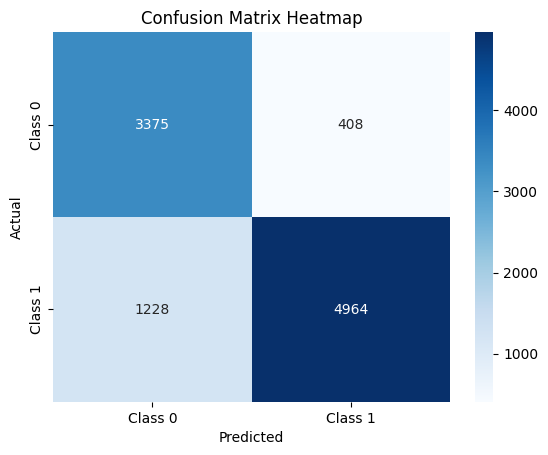

GradientBoosting
Training accuracy:84.91691521090755
Test accuracy:84.37092731829574

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      3783
           1       0.93      0.81      0.87      6192

    accuracy                           0.84      9975
   macro avg       0.84      0.85      0.84      9975
weighted avg       0.86      0.84      0.85      9975




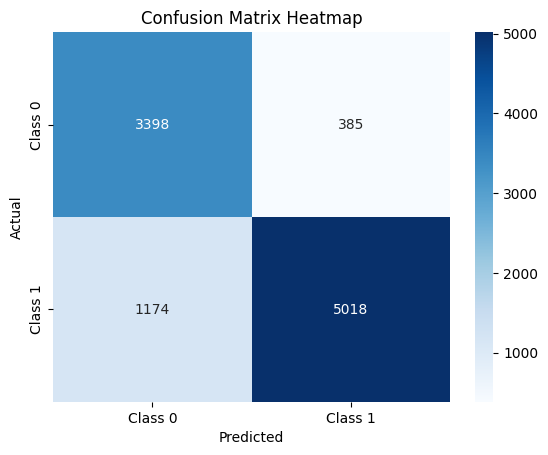

In [77]:

models = {
    'LogisticRegression': LogisticRegression(),
    'GradientBoosting': GradientBoostingClassifier()


}


for model_name, model in models.items():
  print(f"{model_name}")
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  y_prob=model.predict_proba(X_test_scaled)[:, 1]
  # Accuracy
  train_accuracy = model.score(X_train_scaled, y_train) * 100
  test_accuracy = model.score(X_test_scaled, y_test) * 100
  # Evaluate the model
  print(f'Training accuracy:{train_accuracy}')
  print(f'Test accuracy:{test_accuracy}')
  model_evaluation(y_test,y_pred)




### Hypertuning Logistic Regression

In [ ]:
params = {
    'penalty':['l1', 'l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]

}
model = LogisticRegression()
# using recall as scoring metrics because we do not wanted to miss  person who are likely to enrolled
grid_search = GridSearchCV(estimator=model, param_grid=params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [ ]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

Training accuracy:84.15499135316674
Test accuracy:83.58897243107769

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      3783
           1       0.92      0.80      0.86      6192

    accuracy                           0.84      9975
   macro avg       0.83      0.85      0.83      9975
weighted avg       0.85      0.84      0.84      9975




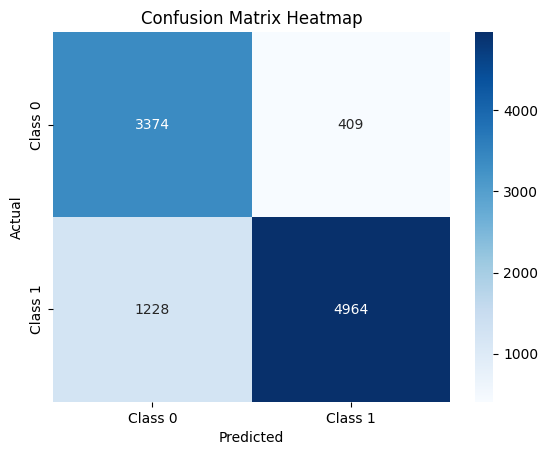

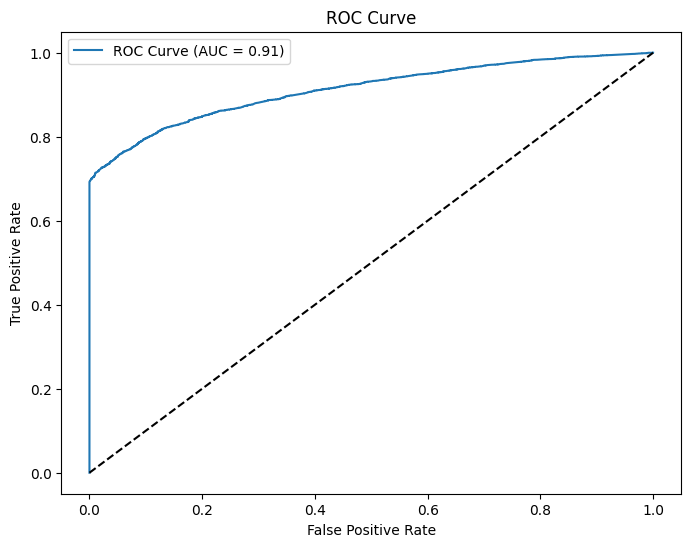

In [ ]:
lm = LogisticRegression(C=10,penalty='l2')
lm.fit(X_train_scaled, y_train)
y_pred = lm.predict(X_test_scaled)
y_prob=lm.predict_proba(X_test_scaled)[:, 1]

# Accuracy
train_accuracy = lm.score(X_train_scaled, y_train) * 100
test_accuracy = lm.score(X_test_scaled, y_test) * 100


# Evaluate the model

print(f'Training accuracy:{train_accuracy}')
print(f'Test accuracy:{test_accuracy}')

model_evaluation(y_test,y_pred)
# Ploting ROC Curve
fpr, tpr, _= roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Using a different threshold to reduce the number of False Negative

Training accuracy:84.15248502468734
Test accuracy:83.59899749373434

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      3783
           1       0.86      0.86      0.86      6192

    accuracy                           0.83      9975
   macro avg       0.82      0.82      0.82      9975
weighted avg       0.83      0.83      0.83      9975




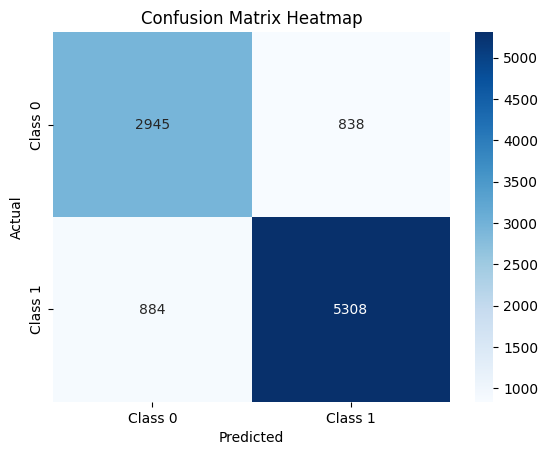

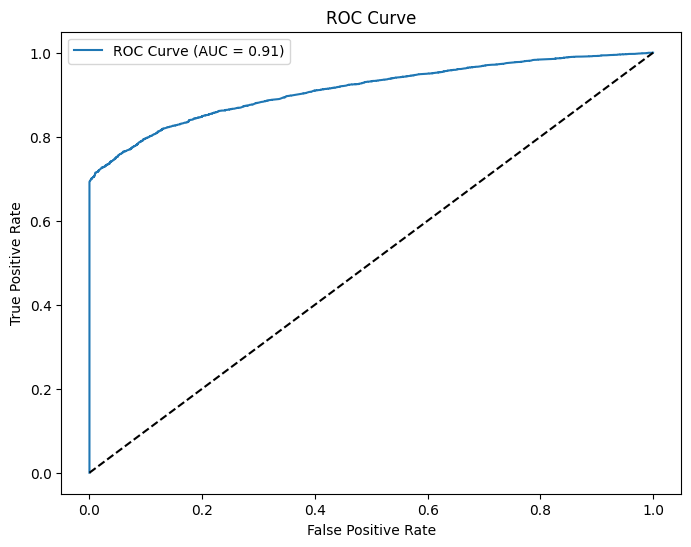

In [ ]:
lm = LogisticRegression()
lm.fit(X_train_scaled, y_train)
lm_y_probs=lm.predict_proba(X_test_scaled)[:, 1]
y_pred=np.where(lm_y_probs > 0.4,1,0)

# Accuracy
train_accuracy = lm.score(X_train_scaled, y_train) * 100
test_accuracy = lm.score(X_test_scaled, y_test) * 100

# Evaluate the model
print(f'Training accuracy:{train_accuracy}')
print(f'Test accuracy:{test_accuracy}')
model_evaluation(y_test,y_pred)
# Ploting ROC Curve
fpr, tpr, _= roc_curve(y_test, lm_y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Gradient Boosting Hypertuning via Grid search cv

In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]

}
gb_model = GradientBoostingClassifier()
# using recall as scoring metrics because we do not wanted to miss  person who are likely to enrolled
grid_search = GridSearchCV(estimator=gb_model, param_grid=params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=1)

In [ ]:
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

Training accuracy:71.89152610341112
Test accuracy:71.13784461152882

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.28      0.43      3783
           1       0.69      0.97      0.81      6192

    accuracy                           0.71      9975
   macro avg       0.78      0.63      0.62      9975
weighted avg       0.76      0.71      0.66      9975




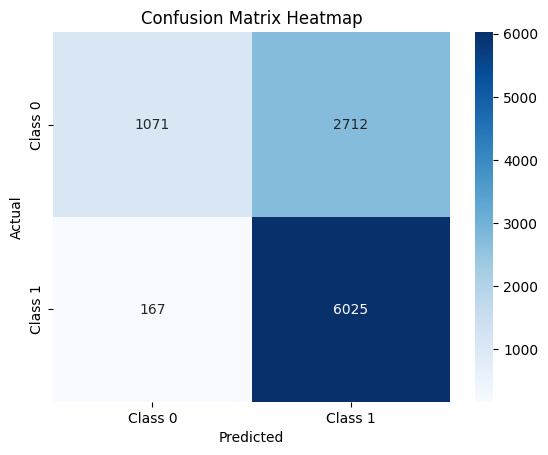

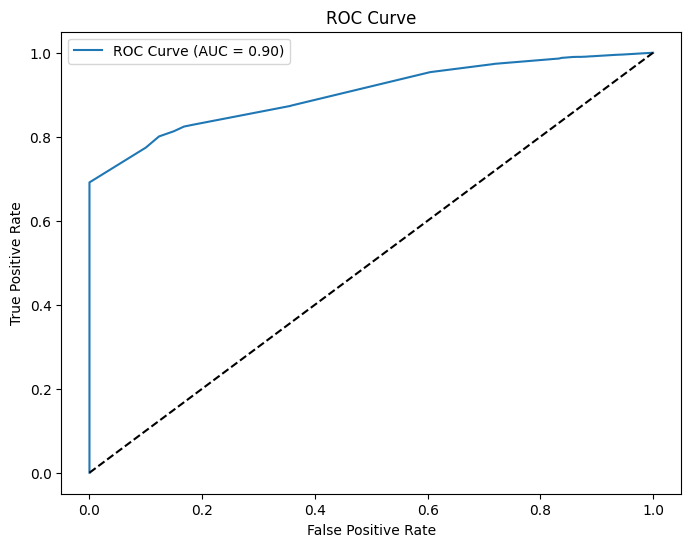

In [ ]:
gb_model = GradientBoostingClassifier(learning_rate=0.01,max_depth=3,min_samples_split=2,n_estimators=50)


gb_model.fit(X_train_scaled, y_train)
y_pred = gb_model.predict(X_test_scaled)
gb_y_probs=gb_model.predict_proba(X_test_scaled)[:, 1]

# Accuracy
train_accuracy = gb_model.score(X_train_scaled, y_train) * 100
test_accuracy = gb_model.score(X_test_scaled, y_test) * 100

# Evaluate the model

print(f'Training accuracy:{train_accuracy}')
print(f'Test accuracy:{test_accuracy}')

model_evaluation(y_test,y_pred)

# Ploting ROC Curve
fpr, tpr, _= roc_curve(y_test, gb_y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()




Comparing ROC AUC Curve of Logestic Regression And Gradient Boosting

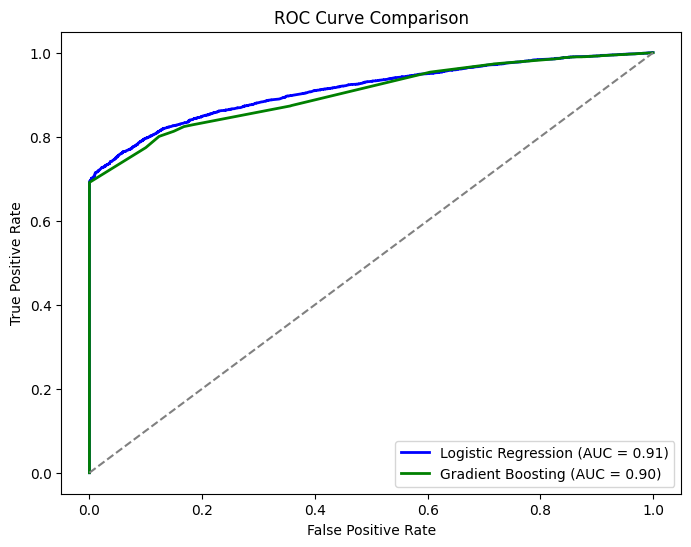

In [ ]:
# Compute ROC curve and AUC for logistic regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, lm_y_probs)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Compute ROC curve and AUC for gradient boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_y_probs)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Plot logistic regression ROC curve
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logreg))

# Plot gradient boosting ROC curve
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_gb))

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')

# Show the plot
plt.show()

For time being ignore below code cells

# Neural Networks

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop
from keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# model.summary()

In [83]:
def neural_model_evalution(hist):
  plt.plot(history.history['loss'],label='Loss on Training Data')
  plt.plot(history.history['val_loss'],label='Loss on Test Data')
  # Set plot labels and title
  plt.xlabel('Number of Epochs')
  plt.ylabel('loss')
  plt.title('Validation loss Comparison')
  plt.legend(loc='best')
  plt.show()


  print("===========================================")

  # Set plot labels and title
  plt.xlabel('Number of Epochs')
  plt.ylabel('Accuracy')
  plt.title('Validation accuracy Comparison')
  plt.plot(history.history['accuracy'],label='Training Accuracy')
  plt.plot(history.history['val_accuracy'],label='Test Accuracy')
  plt.legend(loc='lower right')
  plt.show()

Neural network with 1 hidden layer and 1 Output layer


Optimizer: Adam
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 15)                375       
                                                                 
 dense_26 (Dense)            (None, 1)                 16        
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2660/2660 [==============================] - 7s 3ms/step - loss: 0.3489 - accuracy: 0.8269 - val_loss: 0.3274 - val_accuracy: 0.8354
Epoch 2/100
2660/2660 [==============================] - 6s 2ms/step - loss: 0.3129 - accuracy: 0.8471 - val_loss: 0.3233 - val_accuracy: 0.8420
Epoch 3/100
2660/2660 [==============================] - 7s 3ms/step - loss: 0.3102 - accuracy: 0.8484 - val_loss

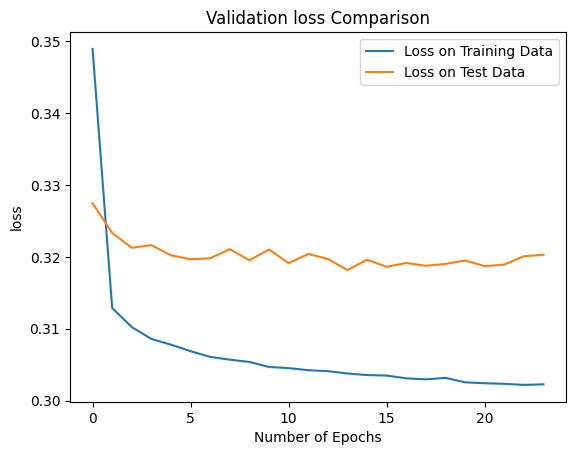

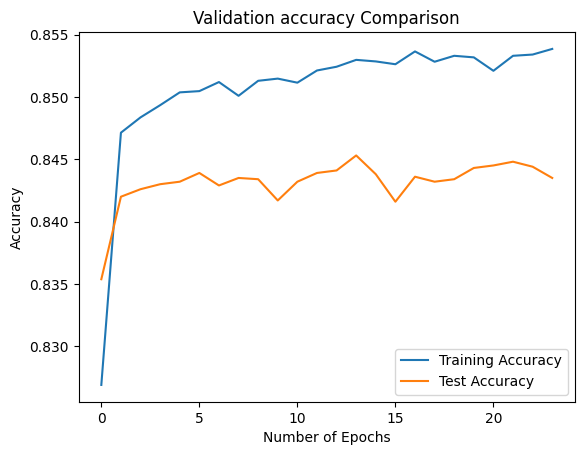

312/312 [==============================] - 1s 2ms/step - loss: 0.3203 - accuracy: 0.8435
Loss: 0.3203, Accuracy: 0.8435



Optimizer: SGD
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 15)                375       
                                                                 
 dense_28 (Dense)            (None, 1)                 16        
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2660/2660 [==============================] - 6s 2ms/step - loss: 0.4004 - accuracy: 0.7919 - val_loss: 0.3420 - val_accuracy: 0.8267
Epoch 2/100
2660/2660 [==============================] - 6s 2ms/step - loss: 0.3268 - accuracy: 0.8383 - val_loss: 0.3290 - val_accuracy:

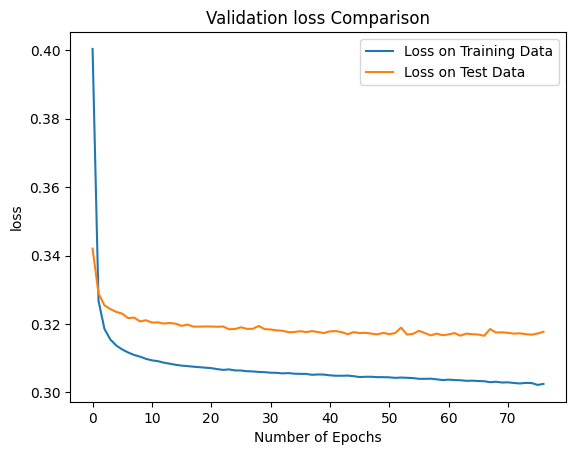

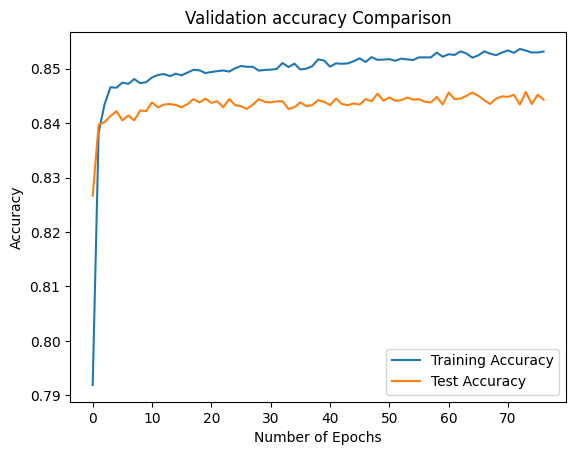

312/312 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.8443
Loss: 0.3178, Accuracy: 0.8443



Optimizer: RMSprop
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 15)                375       
                                                                 
 dense_30 (Dense)            (None, 1)                 16        
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2660/2660 [==============================] - 7s 2ms/step - loss: 0.3523 - accuracy: 0.8215 - val_loss: 0.3266 - val_accuracy: 0.8386
Epoch 2/100
2660/2660 [==============================] - 6s 2ms/step - loss: 0.3159 - accuracy: 0.8465 - val_loss: 0.3234 - val_accur

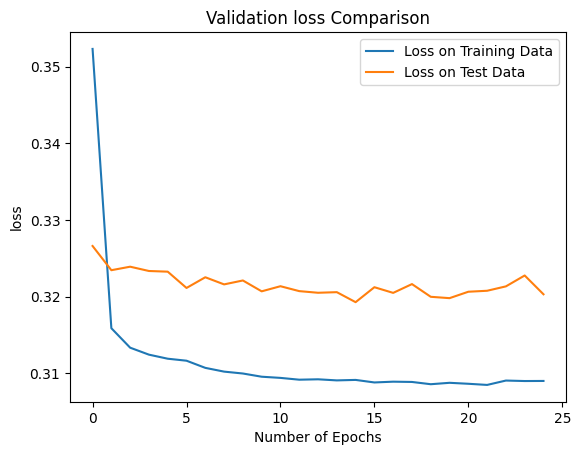

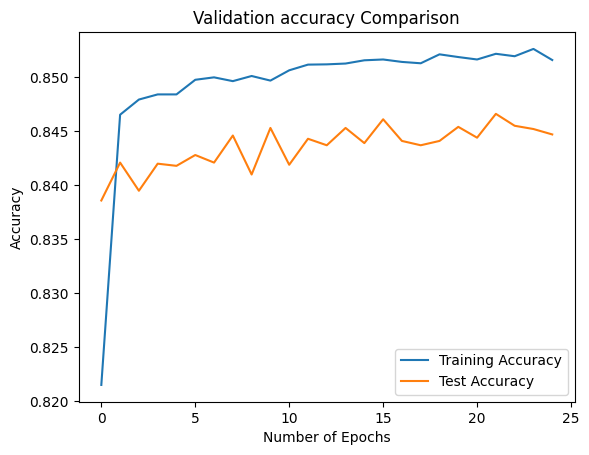

312/312 [==============================] - 1s 2ms/step - loss: 0.3203 - accuracy: 0.8447
Loss: 0.3203, Accuracy: 0.8447




In [86]:
# List of optimizers to try
optimizers = [Adam(), SGD(), RMSprop()]

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

# Loop through each optimizer and create a neural network
for optimizer in optimizers:

    print(f"\nOptimizer: {optimizer.get_config()['name']}")

    # Create Sequential model
    model = Sequential()

    # Add a hidden layer with ReLU activation
    model.add(Dense(units=15, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    # Add output layer with different activations
    if optimizer == RMSprop():
        # RMSprop performs better with softmax in output layer
        model.add(Dense(units=1, activation='softmax'))
    else:
        model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model with binary cross-entropy loss and optimizer

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()

    # Fit the model
    history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=15, verbose=1,callbacks=callback,validation_data=(X_test_scaled, y_test))
    neural_model_evalution(history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)

    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    print("\n")


Neural Network with Two Hidden Layer and 1 output layer


Optimizer: Adam
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 15)                375       
                                                                 
 dense_17 (Dense)            (None, 10)                160       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 546 (2.13 KB)
Trainable params: 546 (2.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2660/2660 [==============================] - 8s 3ms/step - loss: 0.3616 - accuracy: 0.8165 - val_loss: 0.3256 - val_accuracy: 0.8385
Epoch 2/100
2660/2660 [==============================] - 6s 2ms/step - loss: 0.3118 - accuracy: 0.8475 - val_loss: 0.3222 - va

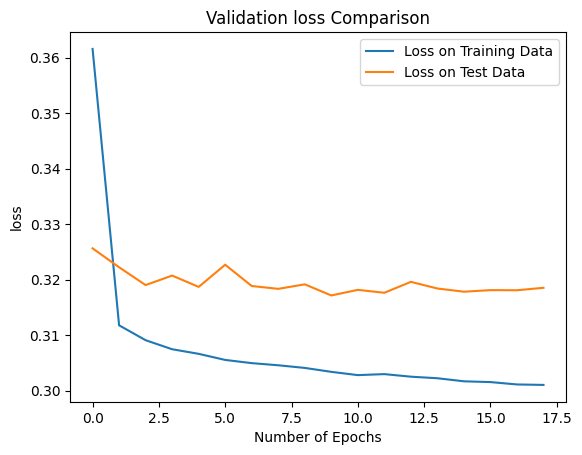

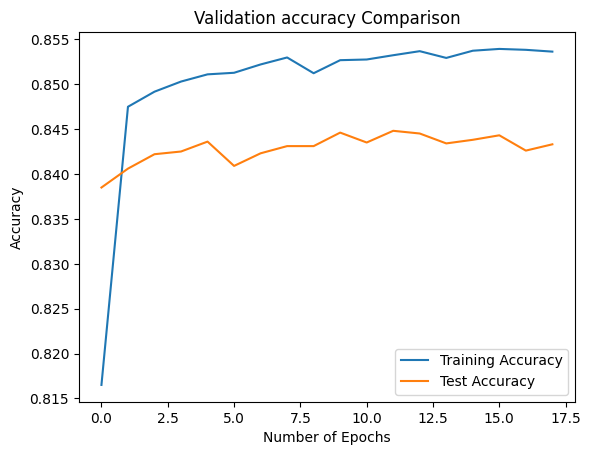

312/312 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8433
Loss: 0.3185, Accuracy: 0.8433



Optimizer: SGD
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 15)                375       
                                                                 
 dense_20 (Dense)            (None, 10)                160       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 546 (2.13 KB)
Trainable params: 546 (2.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2660/2660 [==============================] - 8s 3ms/step - loss: 0.4022 - accuracy: 0.7986 - val_loss: 0.3437 - val_accuracy: 0.8276
Epoch

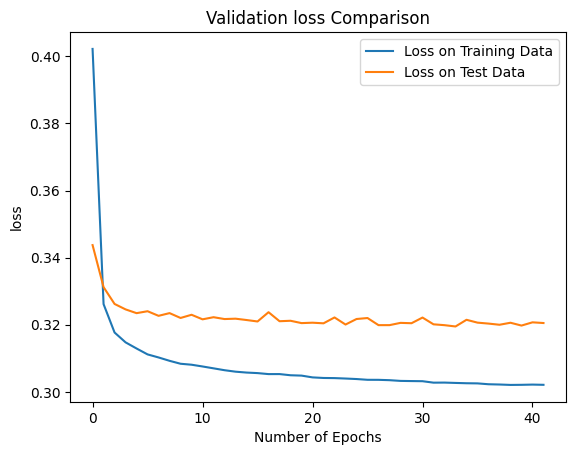

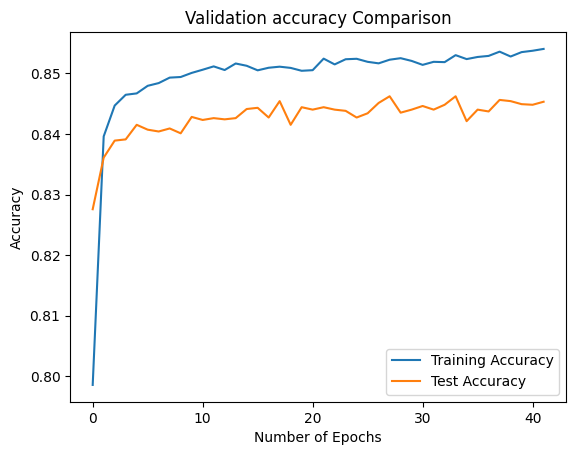

312/312 [==============================] - 1s 2ms/step - loss: 0.3205 - accuracy: 0.8453
Loss: 0.3205, Accuracy: 0.8453



Optimizer: RMSprop
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 15)                375       
                                                                 
 dense_23 (Dense)            (None, 10)                160       
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 546 (2.13 KB)
Trainable params: 546 (2.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2660/2660 [==============================] - 7s 2ms/step - loss: 0.3470 - accuracy: 0.8273 - val_loss: 0.3239 - val_accuracy: 0.8403
E

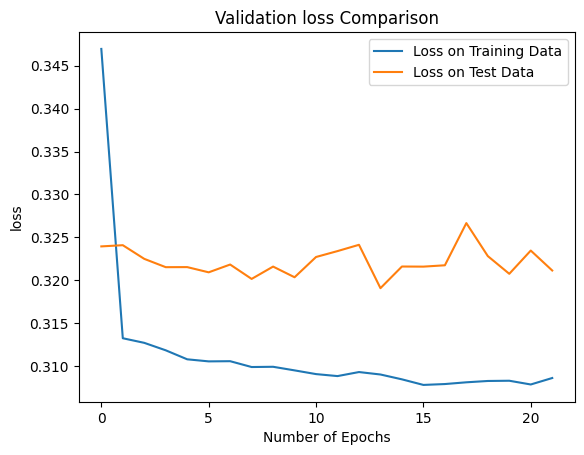

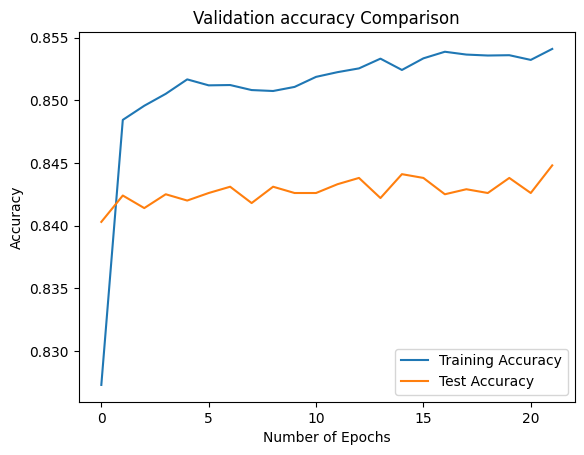

312/312 [==============================] - 1s 2ms/step - loss: 0.3211 - accuracy: 0.8448
Loss: 0.3211, Accuracy: 0.8448




In [85]:
# List of optimizers to try
optimizers = [Adam(), SGD(), RMSprop()]

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=8,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

# Loop through each optimizer and create a neural network
for optimizer in optimizers:

    print(f"\nOptimizer: {optimizer.get_config()['name']}")
    # Create Sequential model
    model = Sequential()

    # Add a hidden layer with ReLU activation
    model.add(Dense(units=15, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=10, activation='relu'))

    # Add output layer with different activations
    if optimizer == RMSprop():
        # RMSprop performs better with softmax in output layer
        model.add(Dense(units=1, activation='softmax'))
    else:
        model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model with binary cross-entropy loss and optimizer

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()

    # Fit the model
    history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=15, verbose=1,callbacks=callback,validation_data=(X_test_scaled, y_test))
    neural_model_evalution(history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)

    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    print("\n")


Neural Network with 3 hidden layer and 1 output layer


Optimizer: Adam
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                375       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
 dense_6 (Dense)             (None, 7)                 77        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 620 (2.42 KB)
Trainable params: 620 (2.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2660/2660 [==============================] - 7s 2ms/step - loss: 0.3589 - accuracy: 0.8178 - val_loss: 0.3240 - val_accuracy: 0

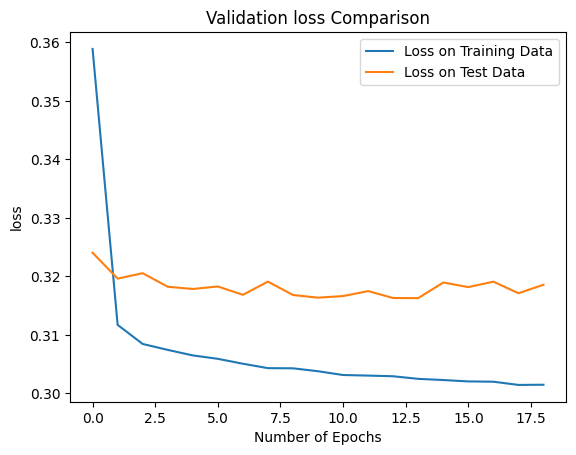

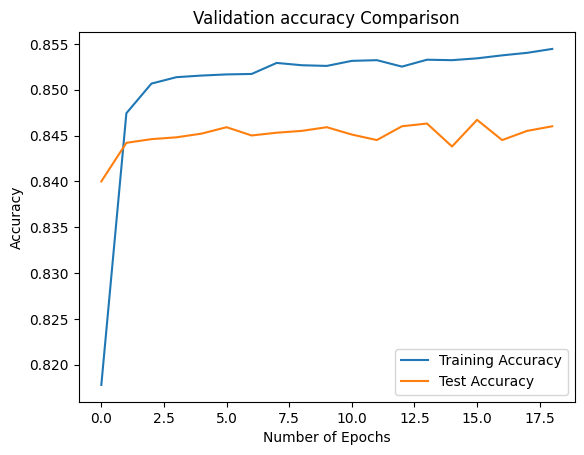

312/312 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.8460
Loss: 0.3186, Accuracy: 0.8460



Optimizer: SGD
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 15)                375       
                                                                 
 dense_9 (Dense)             (None, 10)                160       
                                                                 
 dense_10 (Dense)            (None, 7)                 77        
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 620 (2.42 KB)
Trainable params: 620 (2.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2660/2

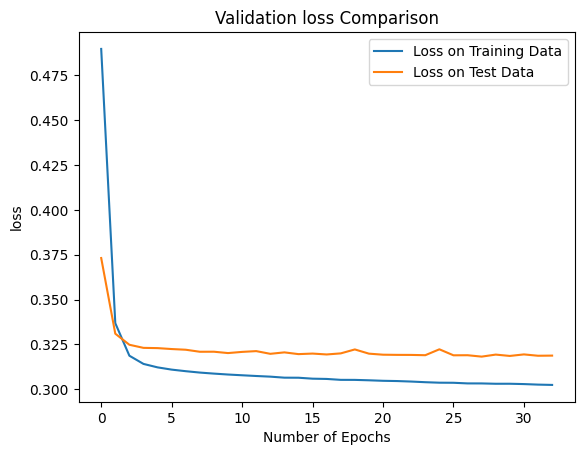

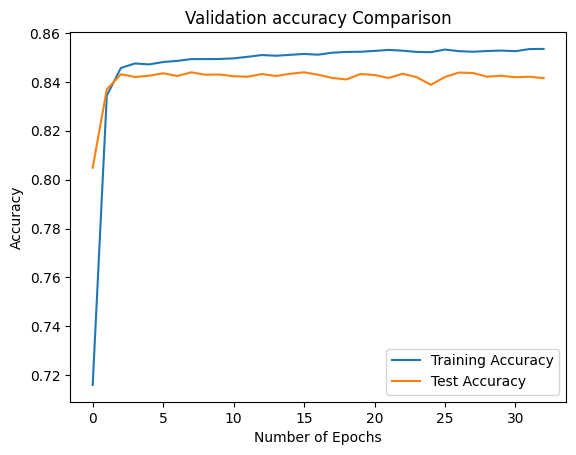

312/312 [==============================] - 1s 2ms/step - loss: 0.3188 - accuracy: 0.8415
Loss: 0.3188, Accuracy: 0.8415



Optimizer: RMSprop
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 15)                375       
                                                                 
 dense_13 (Dense)            (None, 10)                160       
                                                                 
 dense_14 (Dense)            (None, 7)                 77        
                                                                 
 dense_15 (Dense)            (None, 1)                 8         
                                                                 
Total params: 620 (2.42 KB)
Trainable params: 620 (2.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
26

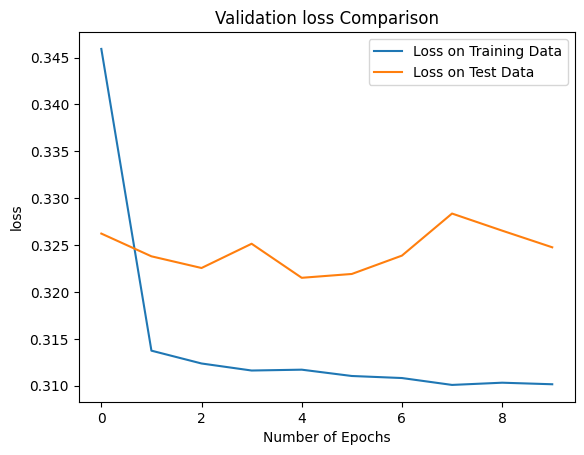

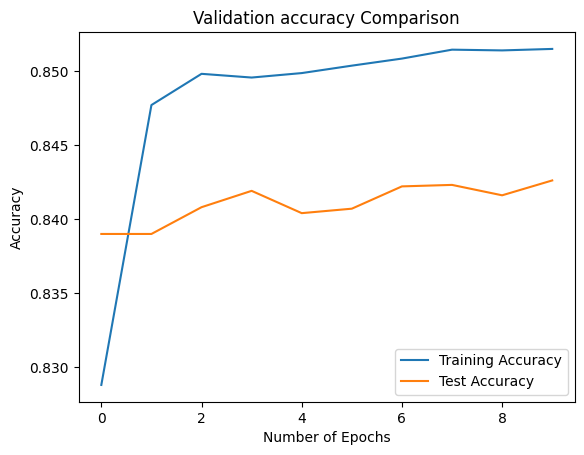

312/312 [==============================] - 1s 2ms/step - loss: 0.3248 - accuracy: 0.8426
Loss: 0.3248, Accuracy: 0.8426




In [84]:
# List of optimizers to try
optimizers = [Adam(), SGD(), RMSprop()]

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

# Loop through each optimizer and create a neural network
for optimizer in optimizers:

    print(f"\nOptimizer: {optimizer.get_config()['name']}")
    # Create Sequential model

    model = Sequential()

    # Add a hidden layer with ReLU activation
    model.add(Dense(units=15, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=7, activation='relu'))
    # Add output layer with different activations
    if optimizer == RMSprop():
        # RMSprop performs better with softmax in output layer
        model.add(Dense(units=1, activation='softmax'))
    else:
        model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model with binary cross-entropy loss and optimizer

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()

    # Fit the model
    history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=15, verbose=1,callbacks=callback,validation_data=(X_test_scaled, y_test))
    neural_model_evalution(history)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)

    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    print("\n")
